In [3]:
#TO IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#TO READ DATA FILE

netflix = pd.read_csv('netflix_titles.csv')

In [5]:
#TO CHECK THE SHAPE OF TABLE

netflix.shape

(8807, 12)

In [6]:
#TO CHECK TABLE STRUCTURE

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#TO CHECK COLUMN PROPERTIES

netflix.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.0,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4


In [8]:
#TO SEE THE FIRST FEW ROWS OF DATA

netflix.head(8)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


DATA CLEANING

In [10]:
#TO CHECK THE PERCENTAGE OF NULL IN EACH COLUMN

for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {round(null_rate, 2)}%")

director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.05%
duration's null rate : 0.03%


In [11]:
# TO UPDATE MISSING VALUES IN 'director', 'cast' and 'country' COLUMNS TO 'NA'

data = netflix.copy()
data[['director', 'cast', 'country']]=netflix.loc[:,['director','cast','country']].fillna('NA')

In [12]:
# TO FILL MISSING VALUES IN 'date_added', 'rating' and 'duration' COLUMN TO MODE VALUE.

data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data.rating.fillna(data.rating.mode()[0], inplace=True)

In [13]:
#TO CHECK THE COUNT OF ALL UNIQUE VALUES IN 'rating' COLUMN INCLUDING NaN 

data.rating.value_counts(dropna=False)

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [37]:
#TO COPY THE DURATION VALUES FROM 'rating TO 'duration' COLUMN
#TO REPLACE THE DURATION VALUES IN 'rating COLUMN BY ITS MODE VALUE 

data.loc[data.rating.str.contains('min'),'duration'] = data.loc[data.rating.str.contains('min'),'rating']
data.loc[data.rating.str.contains('min'), 'rating'] = data.rating.mode()[0]

In [15]:
#TO GET THE COUNT OF NULL VALUES IN EACH COLUMN

data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# FUNCTION TO HANDLE THE MULTI-VALUE COLUMNS

def explode_data(df, col : str, name : str, along:str = 'year_added'):
    return (
    data
        [col]
        .apply(lambda x: x.replace(', ', ',').replace(' ,', ',').split(','))
        .to_frame()
        .set_index(data[along])
        .explode(col)
        .replace('', np.nan)
        .replace('NA', np.nan)
        .dropna()
        .stack()
        .to_frame()
        .reset_index()
        .drop('level_1', axis=1)
        .rename(columns={0:name})
)

In [17]:
#TO CONVERT 'date_added' COLUMN TO datetime AND ADDING NEW COLUMNS

data.date_added = pd.to_datetime(data.date_added)
data['year_added'] = data.date_added.dt.year
data['month_added'] = data.date_added.dt.month_name()
data['day_added'] = data.date_added.dt.day_name()

#TO CONVERT APPROPRIATE COLUMNS TO CATEGORY TYPE.

data = data.astype({
    'type':'category', 
    'rating':'category'
})

Analysis and Visualizations


In [18]:
#TO SET THE THEME

sns.set_theme()

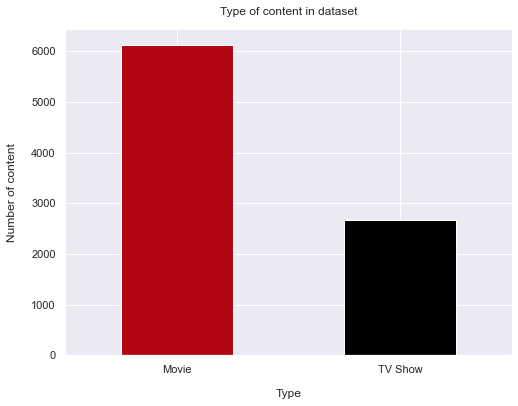

In [19]:
#TO SHOW COUNT OF DIFFERENT CONTENT IN DATA WITH COLUMN CHART

ax = data.type.value_counts().plot(kind='bar', figsize=(8,6), rot=0, color=["#B00710","#000000"])

ax.set_xlabel('Type', labelpad=14)
ax.set_ylabel('Number of content', labelpad=14)
ax.set_title('Type of content in dataset', pad=14)
plt.show()

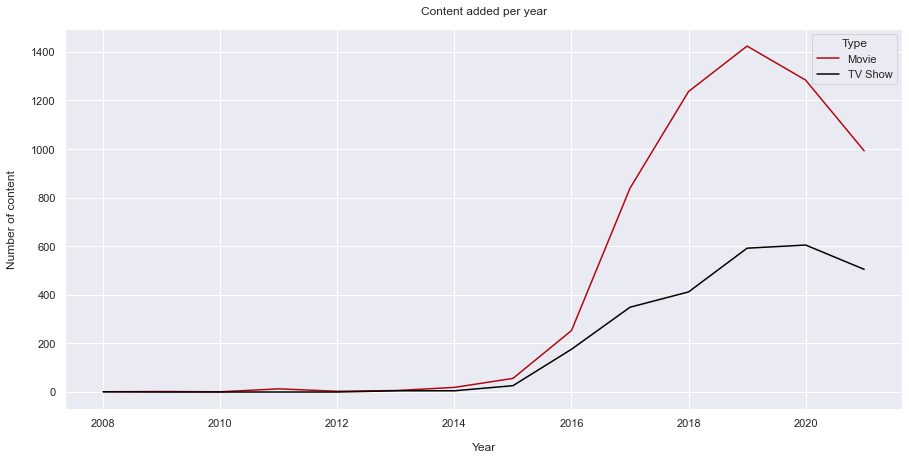

In [20]:
#TO FIND THE YEAR ON YEAR INCREASE OF DIFFERENT CONTENT ON NETFLIX

df = data.groupby('year_added')['type'].value_counts().reset_index()
df =df.rename(columns={'level_1': 'Type', 'type':'count'})
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(x='year_added', y='count', data=df, hue='Type', palette=["#B00710","#000000"])

ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Number of content', labelpad=14)
ax.set_title('Content added per year', pad=14)
plt.show()

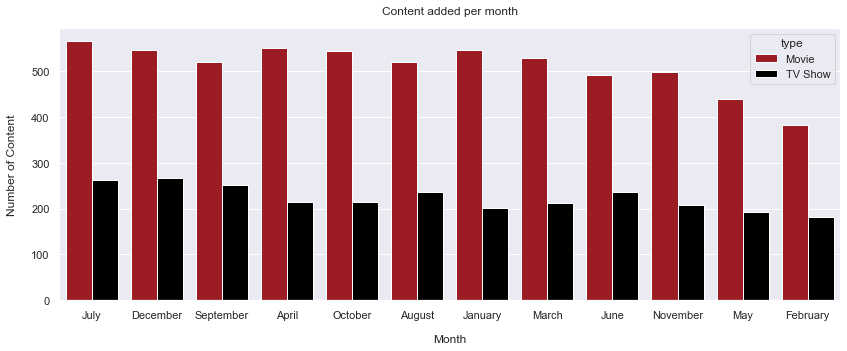

In [21]:
#TO FIND NUMBER OF ADDITION FOR DIFFERENT CONTENT CATEGORY PER MONTH

fig, ax = plt.subplots(figsize=(14, 5))

ax = sns.countplot(x='month_added',
                   data=data, hue='type', 
                   order=data.month_added.value_counts().index, 
                   palette=["#B00710","#000000"])

ax.set_xlabel('Month', labelpad=14)
ax.set_ylabel('Number of Content', labelpad=14)
ax.set_title('Content added per month', pad=14)
plt.show()

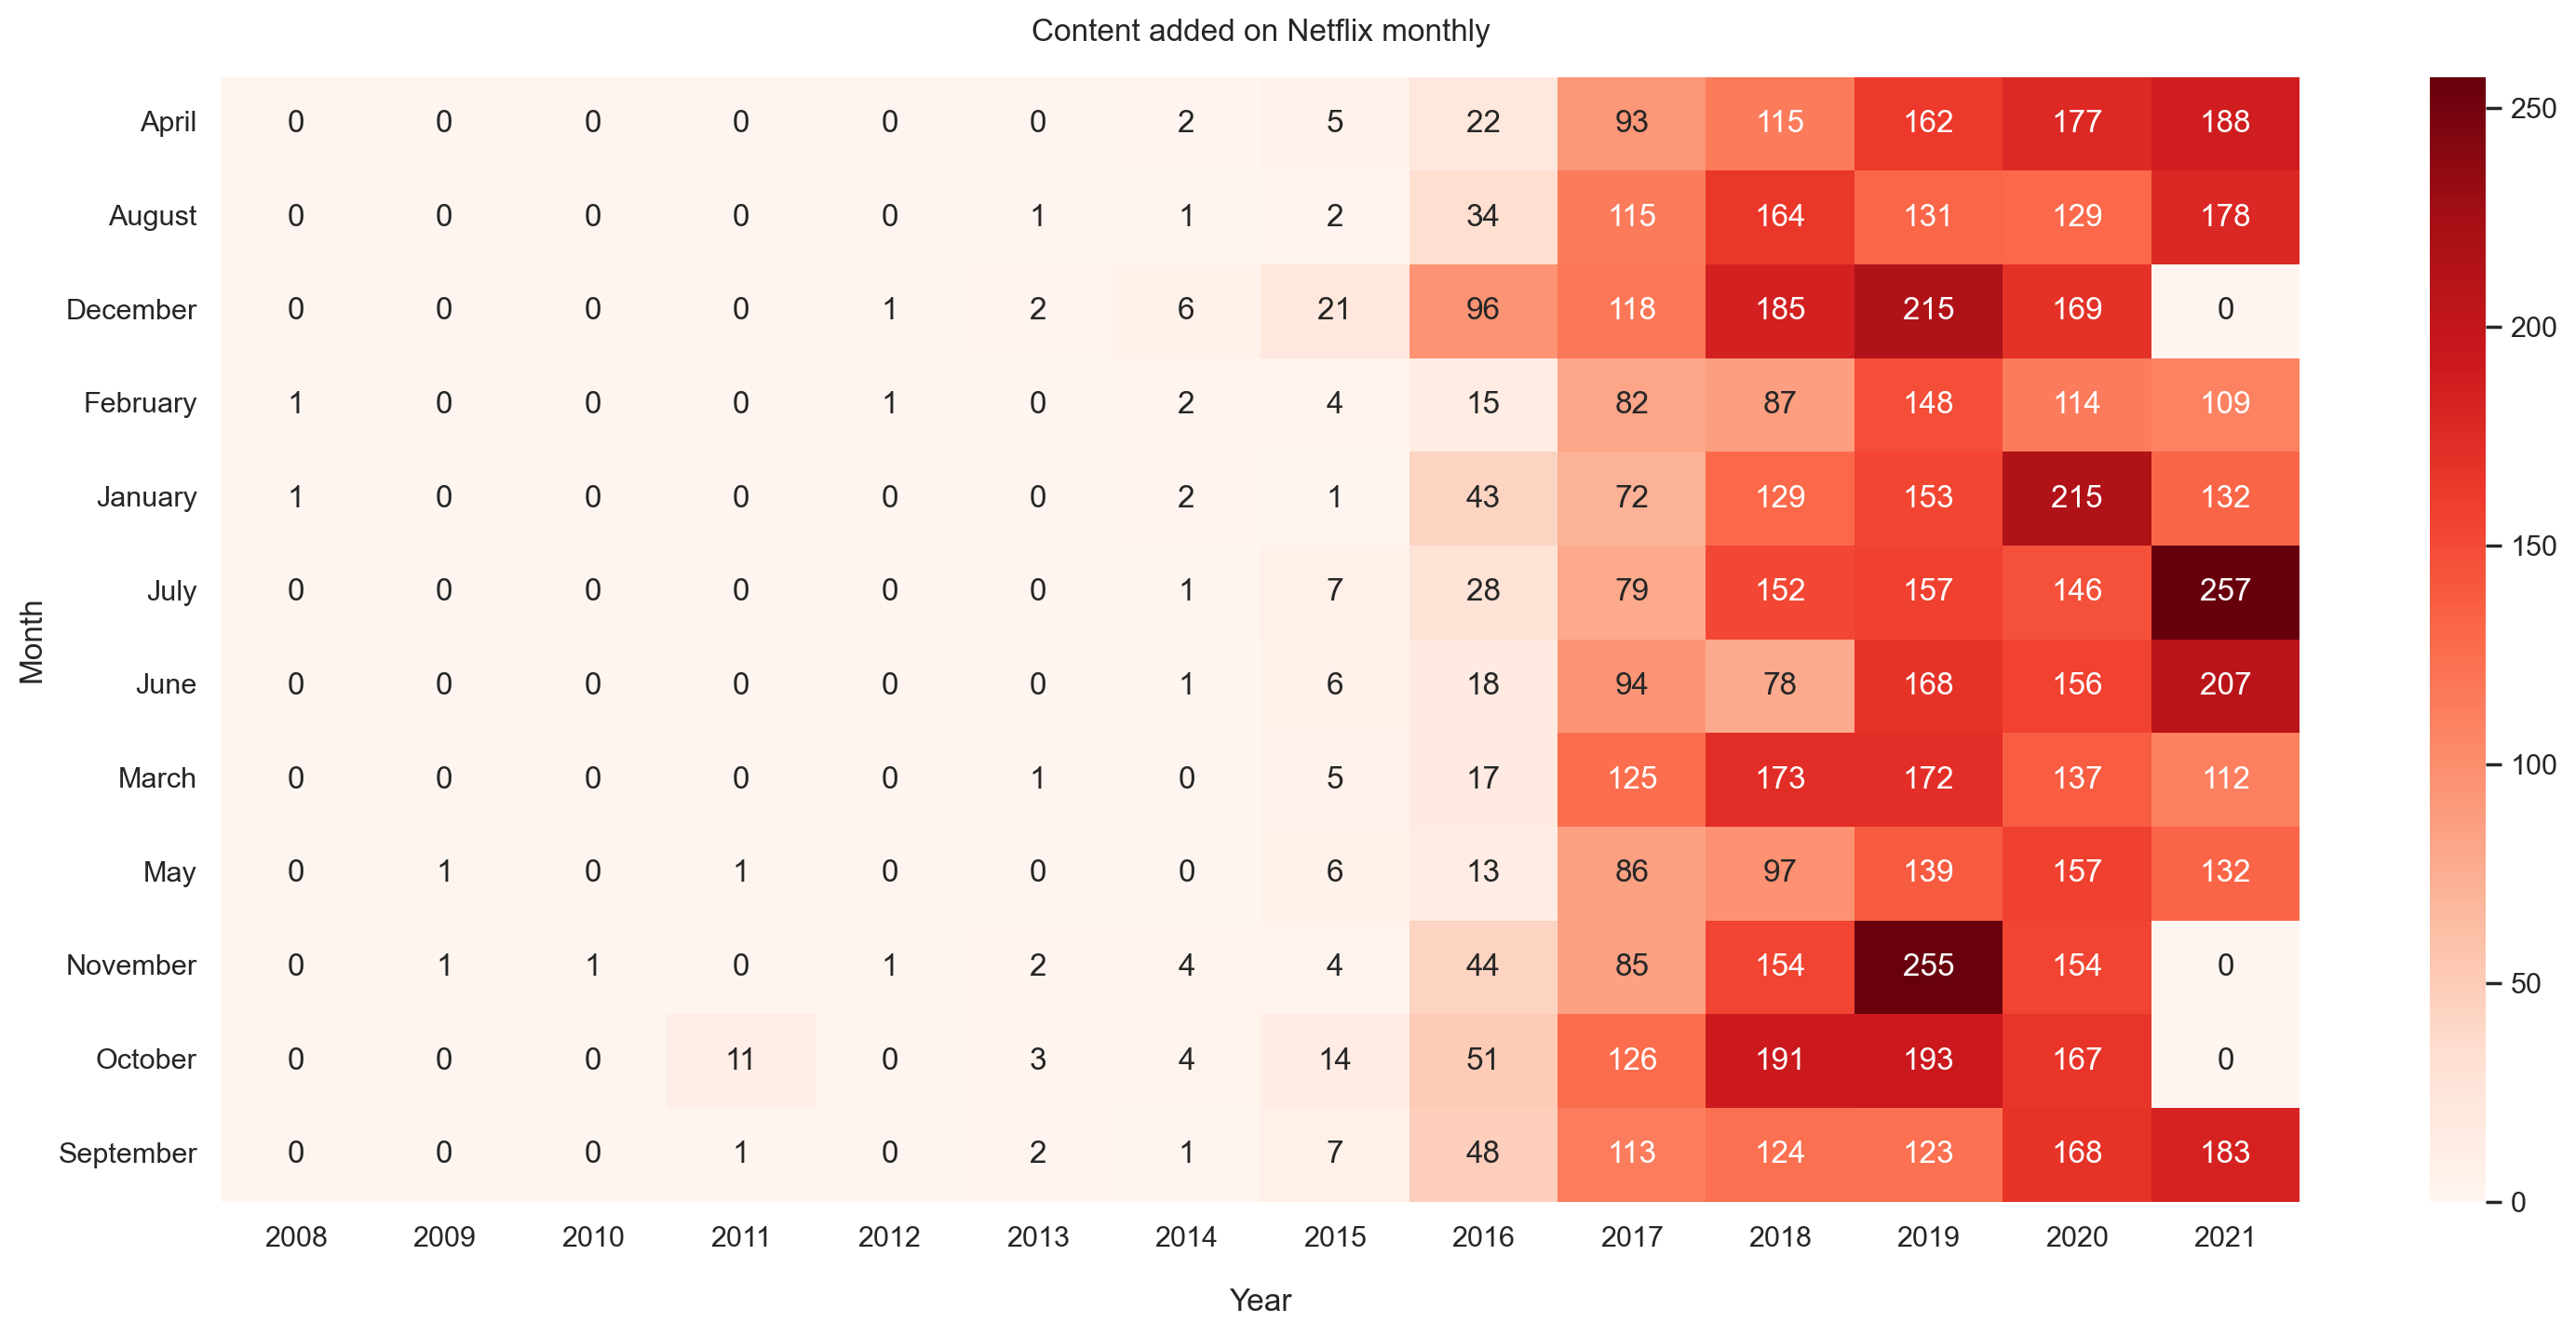

In [22]:
#TO FIND THE NUMBER OF ADDITION FOR DIFFERENT CONTENT CATEGORY PER MONTH EVERY YEAR

year_month_count = (
                    data
                    .loc[:,['year_added', 'month_added']]
                    .value_counts()
                    .reset_index()
                    .rename(columns={0:'count'})
                    .pivot("month_added", "year_added", "count")
                    .fillna(0)
                    .apply(lambda x: x.astype('int'))
                )

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(year_month_count, annot=True, fmt="d", cmap='Reds')
ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Month')
ax.set_title('Content added on Netflix monthly', pad=14)
plt.show()

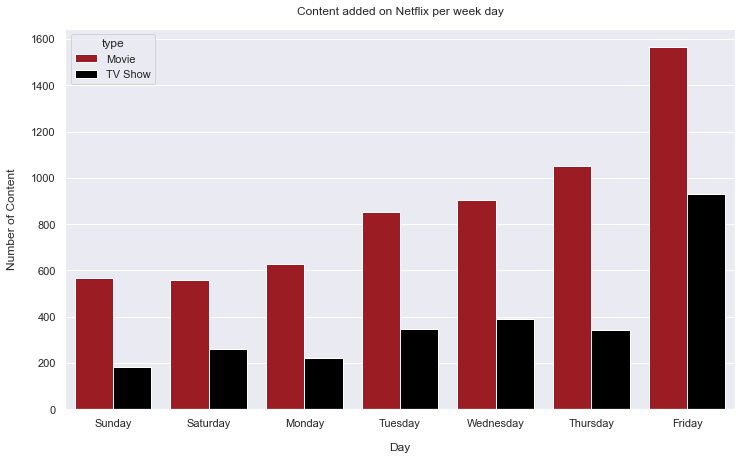

In [23]:
#TO FIND OUT THAT ON WHICH DAY OF WEEK MOST CONTENT ARE ADDED

plt.figure(figsize=(12, 7))
ax = sns.countplot(x='day_added',data=data, 
                   hue='type', 
                   order=data.day_added.value_counts().sort_values().index, 
                   palette=["#B00710","#000000"])

ax.set_title('Content added per week day')
ax.set_xlabel('Day', labelpad=14)
ax.set_ylabel('Number of Content', labelpad=14)
ax.set_title('Content added on Netflix per week day', pad=14)
plt.show()

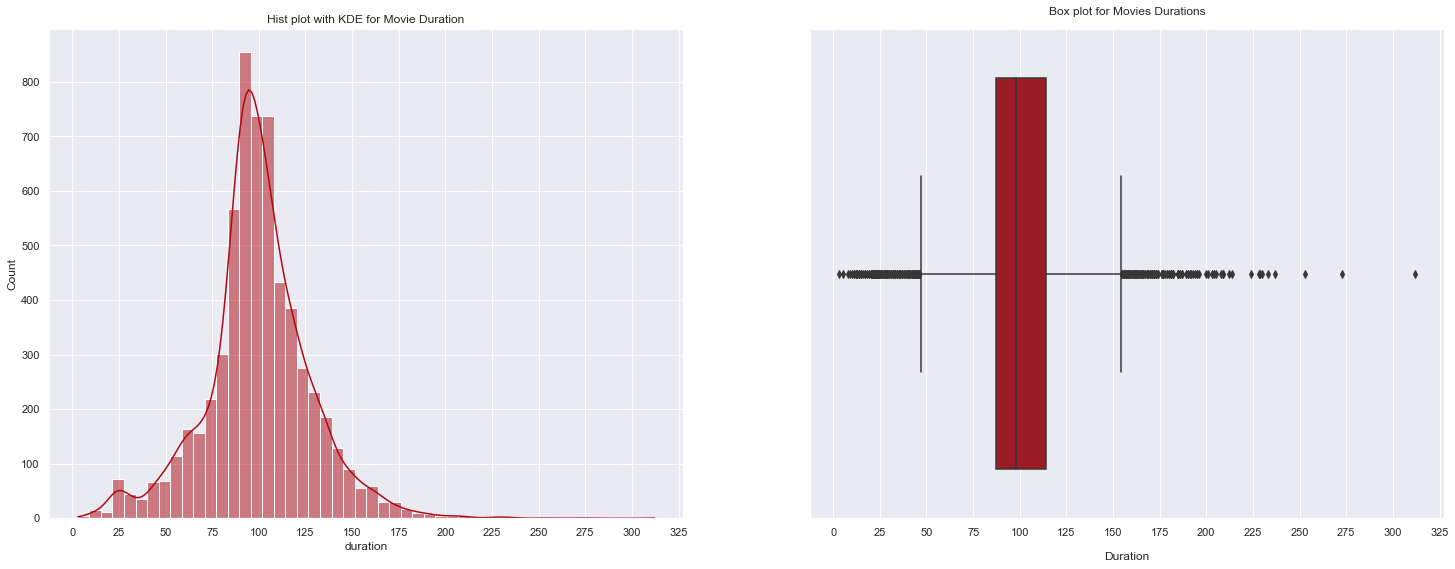

In [24]:
#TO FIND MOST COMMON DURATION OF MOVIES

movie_durations = data[data['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

# Hist plot with KDE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
g = sns.histplot(movie_durations, kde=True, color="#B00710", bins=50, ax = ax1)
ax1.set_title('Hist plot with KDE for Movie Duration')
g.set(xticks=np.arange(0, 350, 25))

# Box plot
sns.boxplot(x=movie_durations, color="#B00710", ax = ax2)
ax2.set_xticks(np.arange(0,350, 25))
ax2.set_xlabel('Duration', labelpad=14)
ax2.set_title('Box plot for Movies Durations', pad=14)
plt.show()

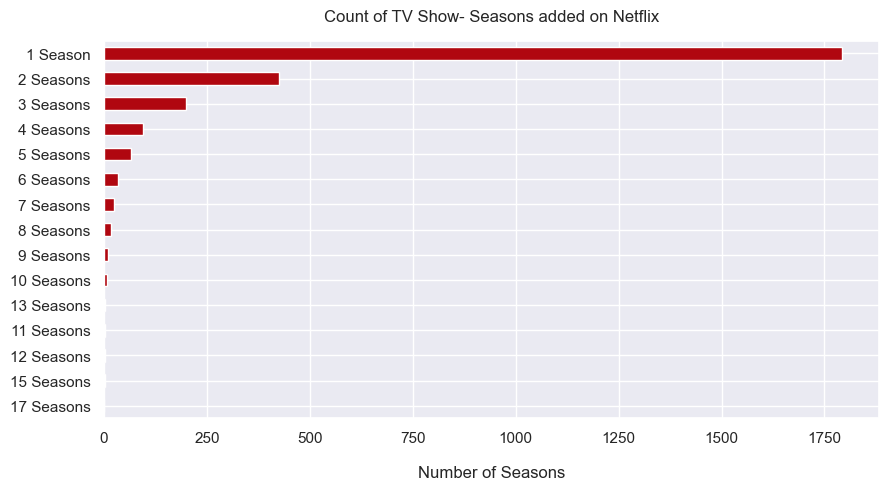

In [25]:
#TO FIND THE MOST COMMON NUMBER OF SEASONS RELEASED ON NETFLIX

seasons = data[data['duration'].str.contains('Season')]['duration']

plt.figure(figsize=(10,5), dpi=100)
ax = seasons.value_counts().sort_values().plot(y='duration', kind='barh',color=["#B00710"])
ax.set_title('Content added per week day')
ax.set_xlabel('Number of Seasons', labelpad=14)

ax.set_title('Count of TV Show- Seasons added on Netflix', pad=14)
plt.show()

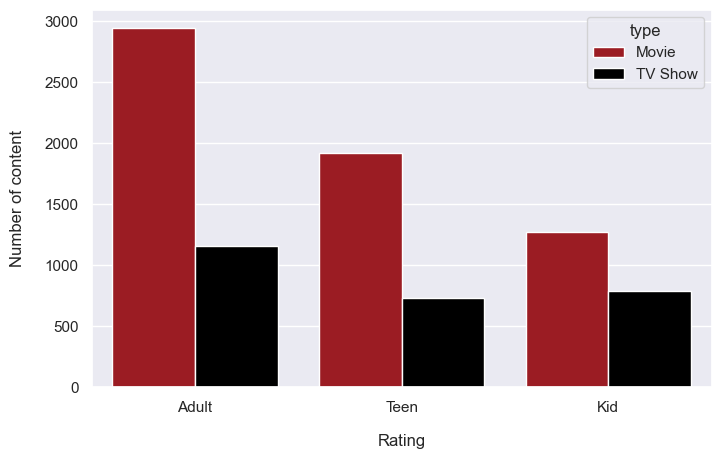

In [26]:
#TO DIVIDE AUDIENCE IN CATEGORIES ACCORDING TO THE RATING CERTIFICATE AND FIND OUT THIER CONTENT SHARE

Kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
Teens = ['PG-13', 'TV-14']
Adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def rate(x):
    if x in Kids:
        return 'Kid'
    elif x in Teens:
        return 'Teen'
    elif x in Adults:
        return 'Adult'
    
df1 = data['rating'].apply(rate)
df2 = pd.concat([df1, data['type']], axis=1)
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='rating',data=df2, hue='type', order=['Adult', 'Teen', 'Kid'], palette=["#B00710","#000000"])
ax.set_ylabel('Number of content', labelpad=14)
ax.set_xlabel('Rating', labelpad=14)
plt.show()

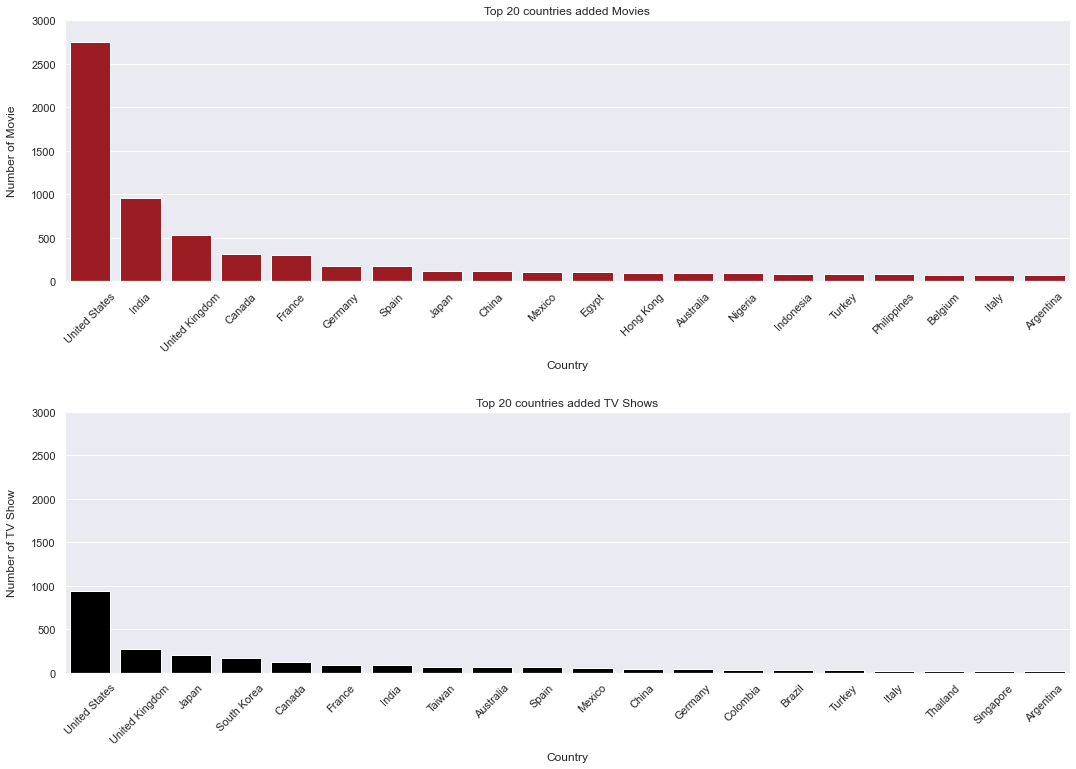

In [27]:
#TO FIND THE COUNT OF CONTENT ADDED FOR TOP 20 COUNTRIES IN RESPECTIVE CONTENT TYPE

country_data = explode_data(data, 'country', 'country', 'type')
df = country_data.value_counts().reset_index(level=1)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,12))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='country',y =0, data=df.loc['Movie'].head(20), color="#B00710", ax=ax1, )
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_title('Top 20 countries added Movies')
ax1.set_ylabel('Number of Movie', labelpad=14)
ax1.set_xlabel('Country', labelpad=7)
ax1.set_yticks(np.arange(0,3500,500))


sns.barplot(x='country',y =0, data=df.loc['TV Show'].head(20), color="#000000", ax = ax2)
ax2.set_title('Top 20 countries added TV Shows')
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_ylabel('Number of TV Show', labelpad=14)
ax2.set_xlabel('Country', labelpad=7)
ax2.set_yticks(np.arange(0,3500,500))
plt.show()

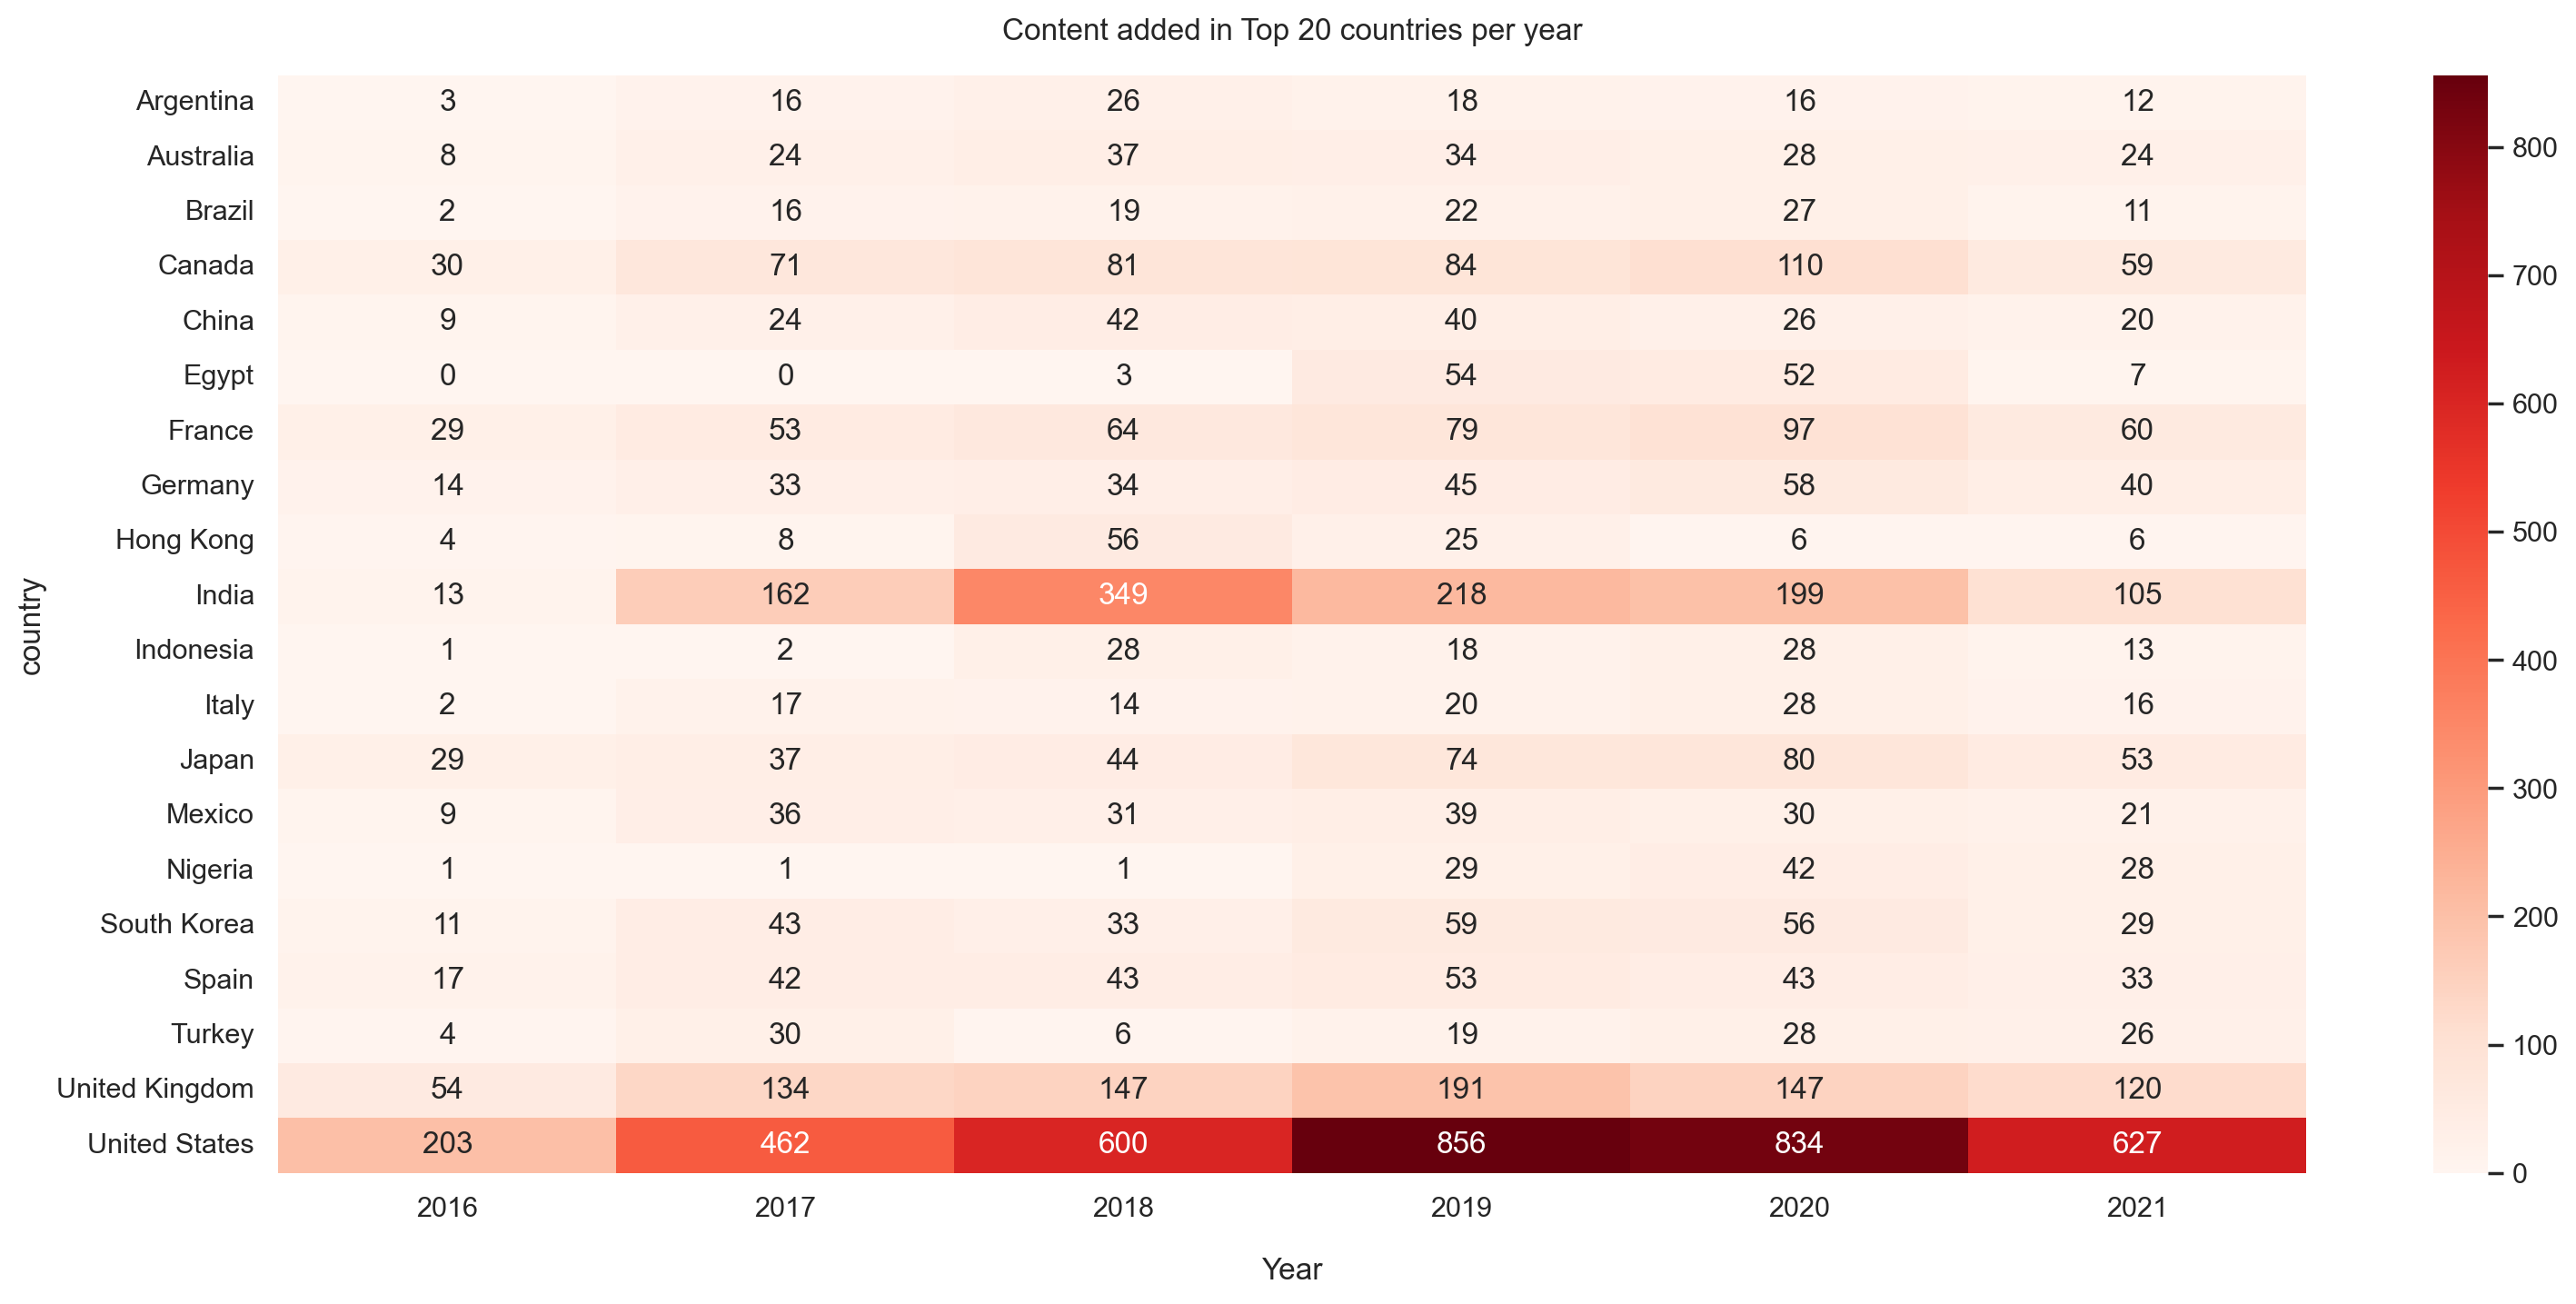

In [28]:
#TO FIND THE COUNT OF CONTENT ADDED FOR TOP 20 COUNTRIES PER YEAR

country_data = explode_data(data, 'country', 'country')

country_data = country_data[country_data['year_added']>2015]
country_data = (
    country_data
    [country_data['country'].isin(country_data['country'].value_counts().head(20).index)]
    .value_counts()
    .reset_index()
    .pivot("country", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(country_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Year', labelpad=14)
ax.set_title('Content added in Top 20 countries per year', pad=14)
plt.show()

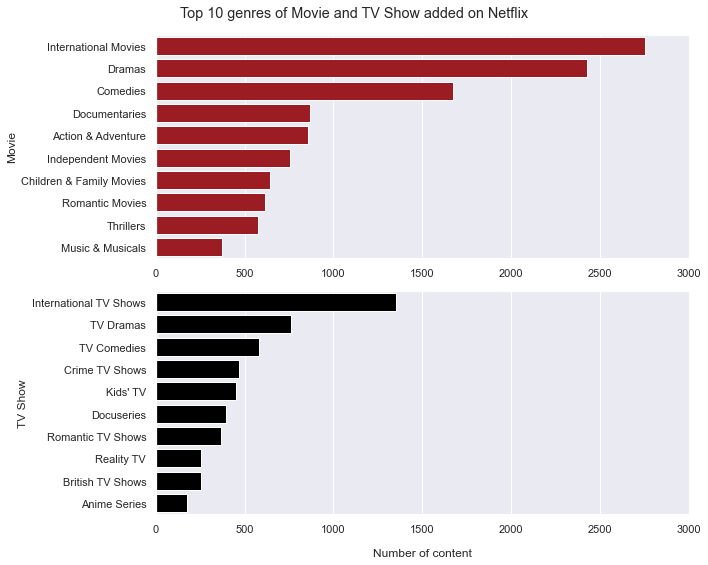

In [29]:
#TO FIND TOP POPULAR GENRES ON NETFLIX

genre_data = explode_data(data, 'listed_in', 'genre', 'type')
df = genre_data.value_counts().reset_index(level=1)

fig, ax = plt.subplots(2,1, figsize=(10, 8))

fig.subplots_adjust(hspace=0.9)
sns.barplot(x=0,y ='genre', data=df.loc['Movie'].head(10), color="#B00710", ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Movie')
ax[0].set_xticks(np.arange(0,3500,500))

sns.barplot(x=0,y ='genre', data=df.loc['TV Show'].head(10), color="#000000", ax=ax[1])
ax[1].set_xlabel('Number of content', labelpad=14)
ax[1].set_ylabel('TV Show')
ax[1].set_xticks(np.arange(0,3500,500))
fig.suptitle('Top 10 genres of Movie and TV Show added on Netflix')
fig.tight_layout()

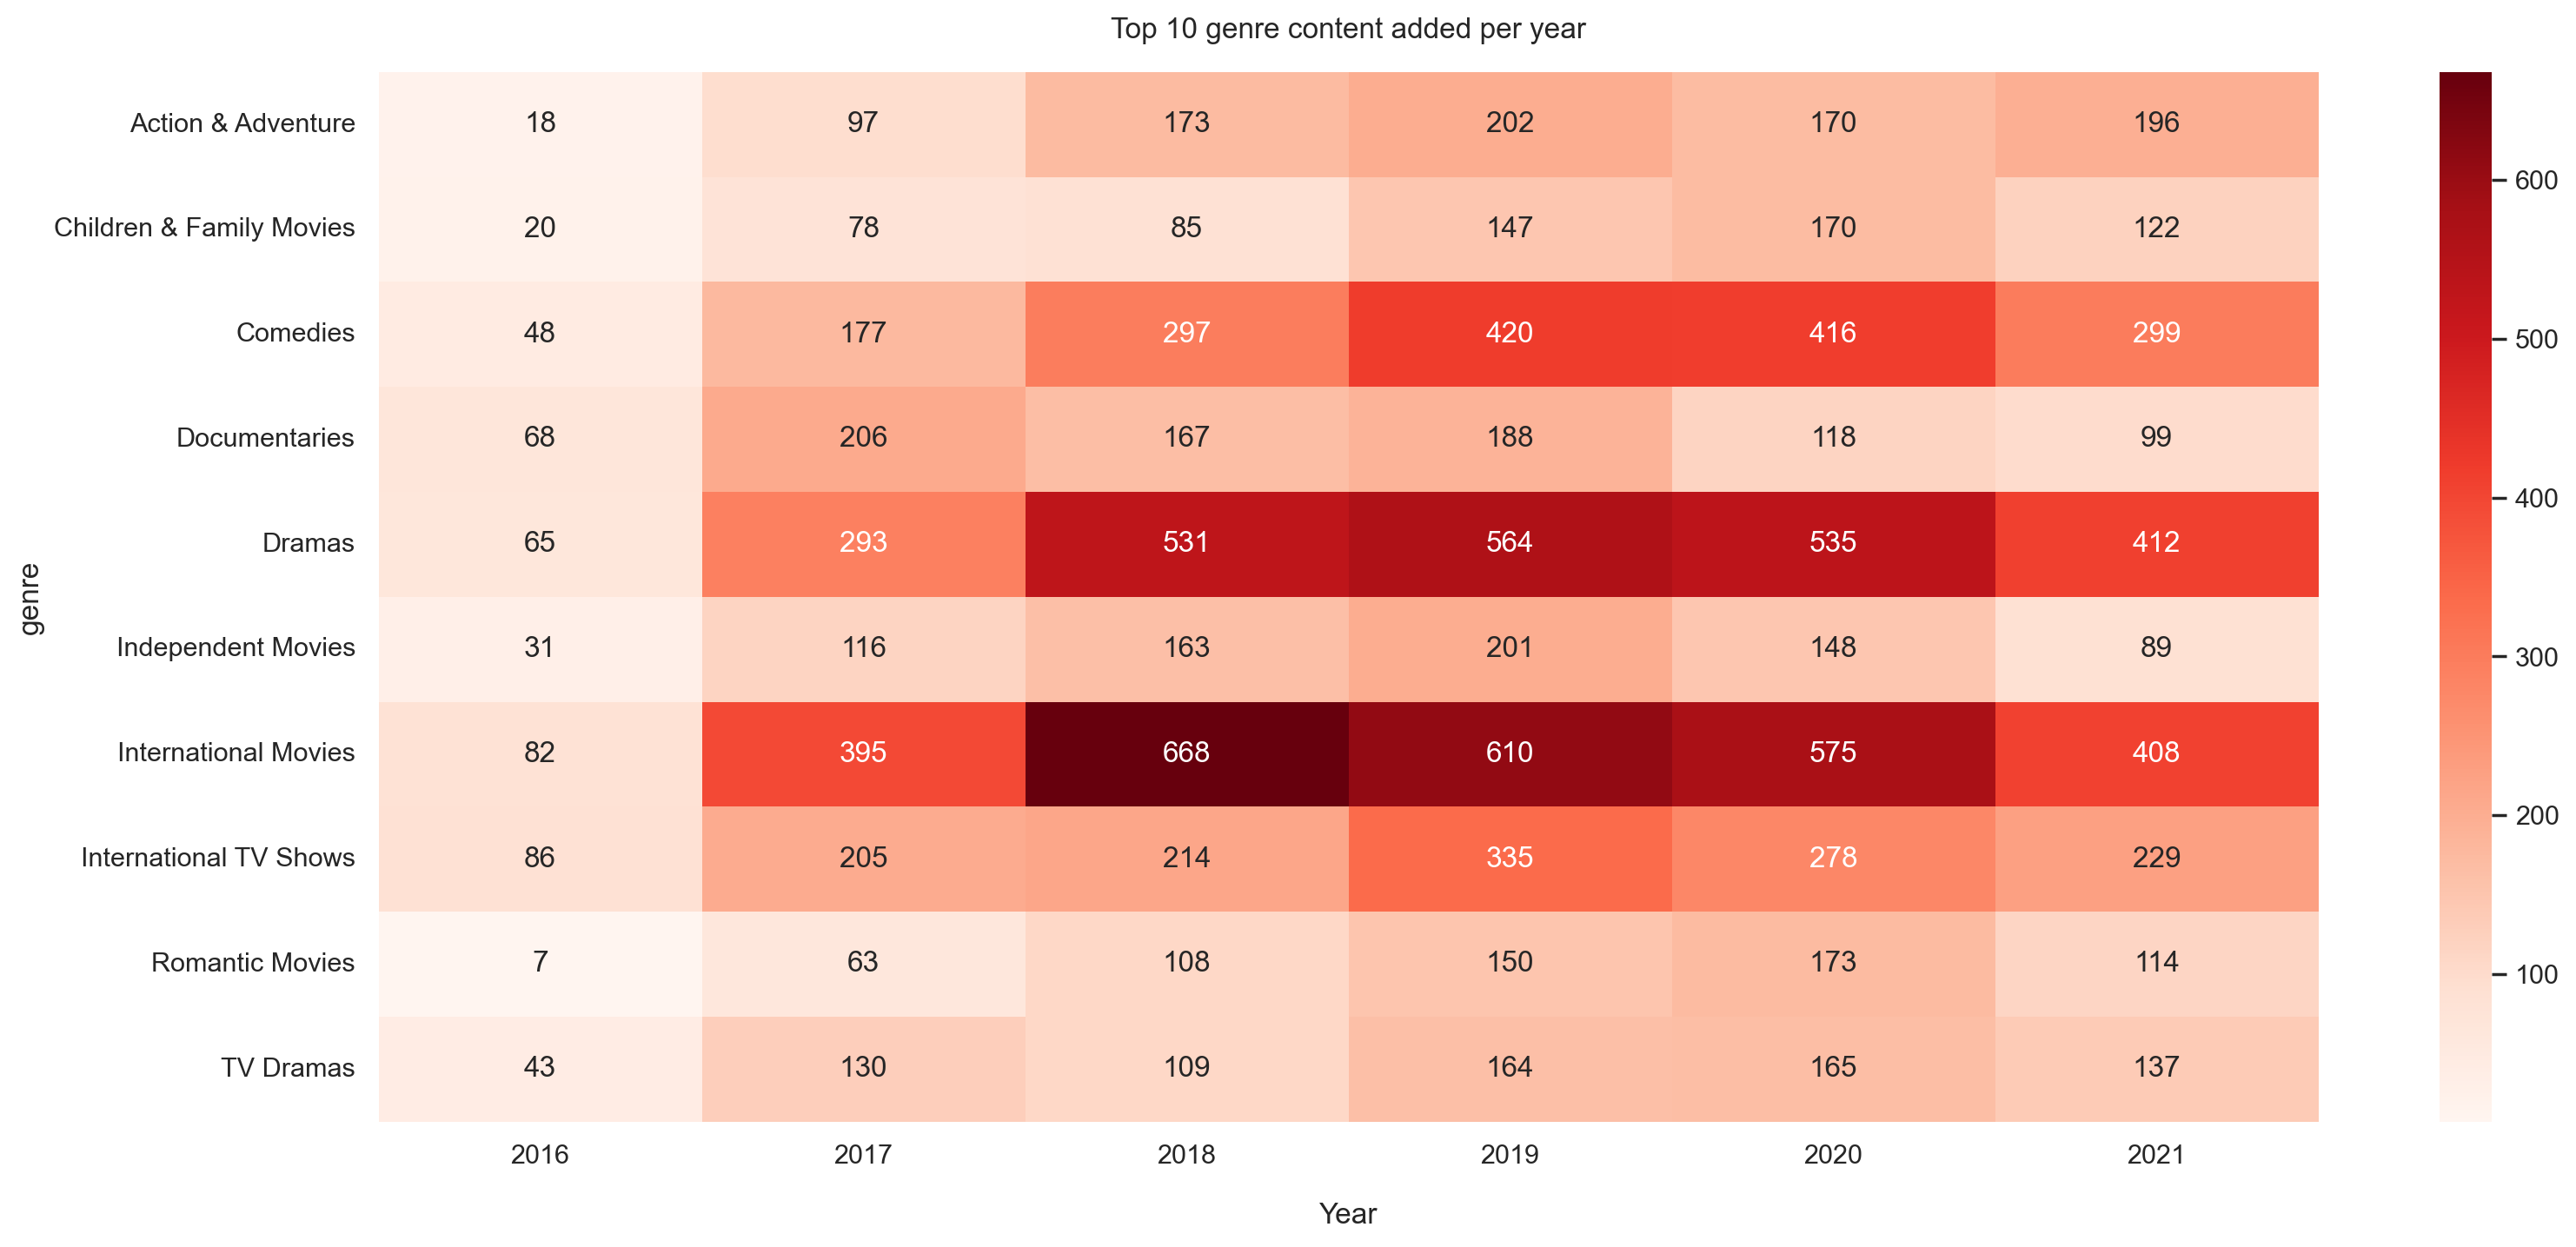

In [30]:
#TO FIND COUNT OF TOP POPULAR GENRES ADDED ON NETFLIX PER YEAR

genre_data = explode_data(data, 'listed_in', 'genre')

genre_data = genre_data[genre_data['year_added']>2015]
genre_data = (
    genre_data
    [genre_data['genre'].isin(genre_data['genre'].value_counts().head(10).index)]
    .value_counts()
    .reset_index()
    .pivot("genre", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(genre_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Year', labelpad=14)
ax.set_title('Top 10 genre content added per year', pad=14)
plt.show()

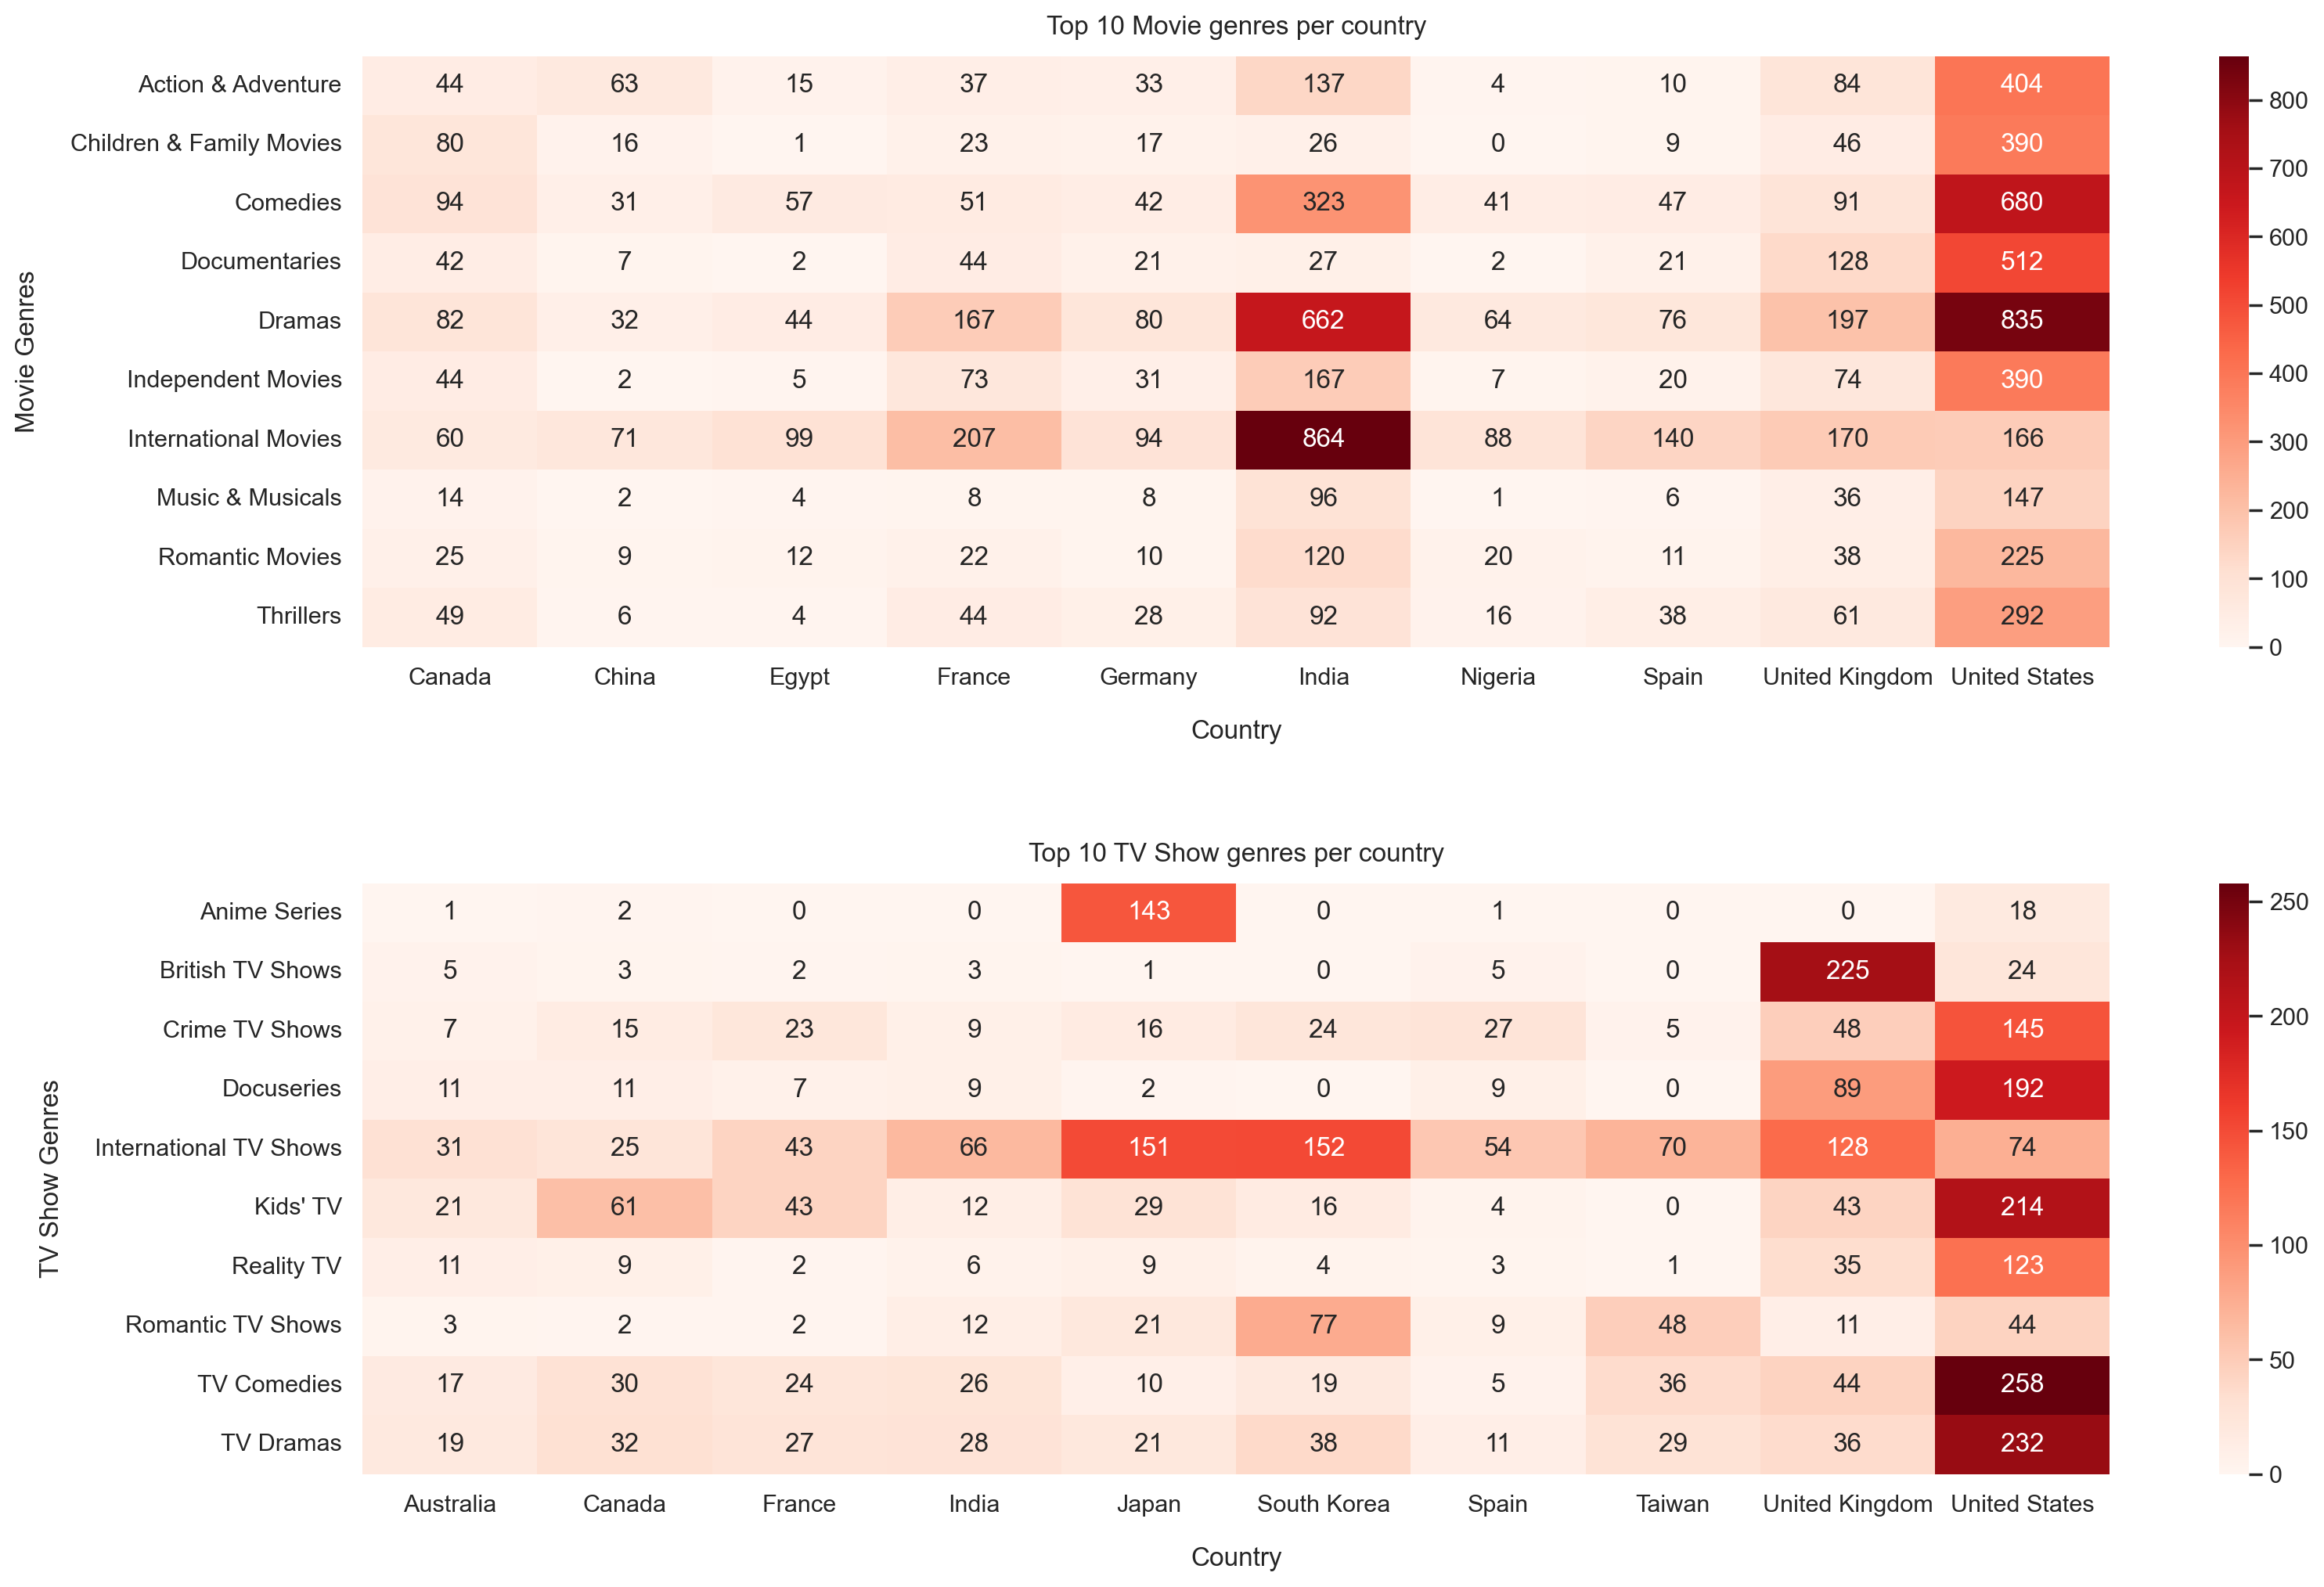

In [31]:
#TO FIND COUNT OF TOP POPULAR GENRES ADDED ON NETFLIX PER COUNTRY

country_data = explode_data(data, 'country', 'country', 'title')
genre_data = explode_data(data, 'listed_in', 'genre', 'title')
genre_data_type = explode_data(data, 'listed_in', 'genre', 'type')

genre_data_type = genre_data_type.value_counts().reset_index(level=1)
top_movie_genres = list(genre_data_type.loc['Movie'].head(10)['genre'].values)
top_tv_genres = list(genre_data_type.loc['TV Show'].head(10)['genre'].values)

df = country_data.merge(genre_data).drop('title', axis=1)
df1 = df[df['genre'].isin(top_movie_genres)]
df2 = df[df['genre'].isin(top_tv_genres)]

def make_data(df):
    return (
        df
        [df['country'].isin(df['country'].value_counts().head(10).index)]
        .value_counts()
        .reset_index()
        .pivot("genre", "country", 0)
        .fillna(0)
        .apply(lambda x: x.astype('int'))
        )

df1 = make_data(df1)
df2 = make_data(df2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,12), dpi=200)
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df1, annot=True, fmt="d", cmap='Reds', ax=ax1)
ax1.set_xlabel('Country', labelpad=14)
ax1.set_ylabel('Movie Genres', labelpad=14)
ax1.set_title('Top 10 Movie genres per country', pad=10)

sns.heatmap(df2, annot=True, fmt="d", cmap='Reds', ax=ax2)
ax2.set_xlabel('Country', labelpad=14)
ax2.set_ylabel('TV Show Genres', labelpad=14)
ax2.set_title('Top 10 TV Show genres per country', pad=10)
plt.show()